In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load products, queries, ranking and relevances

In [2]:
dataset = 'esci-es'
model_folder = 'text-004'

In [3]:
q = pd.read_parquet(f'{model_folder}/{dataset}-queries.parquet')
p = pd.read_parquet(f'{model_folder}/{dataset}-products.parquet')
r = pd.read_parquet(f'{model_folder}/{dataset}-ranking_with_relevance.parquet')

# select a random query and get dot product similarities

In [4]:
qi = q.sample(1).iloc[0]
qi

query                          capsulas dolce gusto recargables
embeddings    [-0.01903287, -0.009790788, -0.028733235, -0.0...
Name: 22616, dtype: object

In [5]:
pi = r[r.query_id == qi.name].copy().set_index('product_id')
pi['dotp_similarity'] = np.stack(p.loc[pi.index].embeddings).dot(qi.embeddings)

In [6]:
pi.head()

,query_id,model_rank,relevance,dotp_similarity
product_id,,,,
B00XLGZ4RY,22616,1,4.0,0.717499
B07SQ94KJG,22616,2,0.0,0.707196
B01K4S2O5G,22616,3,4.0,0.700249
B07BRTC7CS,22616,4,4.0,0.681160
B07YQDFRXW,22616,5,0.0,0.678457


# inspect top ranked products

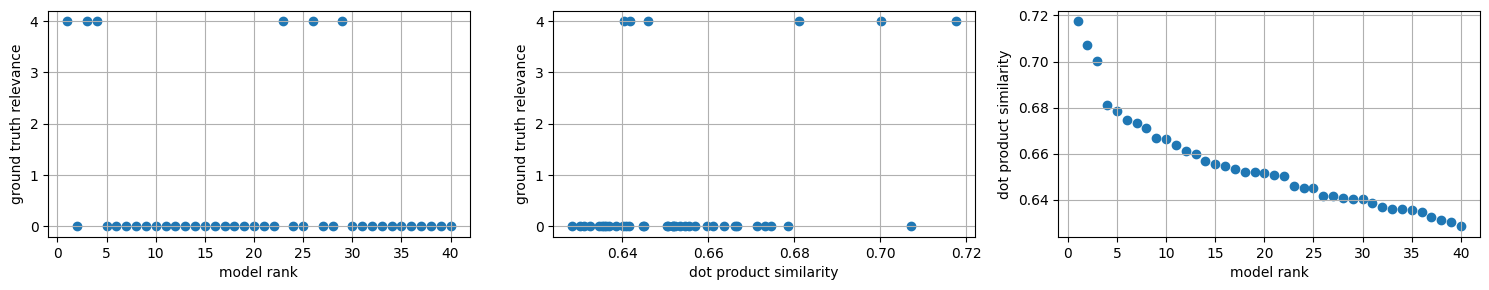

In [7]:
nrows, ncols = 1,3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3), sharex=False, sharey=False)
for i, ax in enumerate(axes.flat):
    if i==0:
        ax.scatter(pi.model_rank.values, pi.relevance.values)
        ax.set_xlabel('model rank')
        ax.set_ylabel('ground truth relevance')
    if i==1:
        ax.scatter(pi.dotp_similarity.values, pi.relevance.values)
        ax.set_xlabel('dot product similarity')
        ax.set_ylabel('ground truth relevance')
    if i==2:
        ax.scatter(pi.model_rank.values, pi.dotp_similarity.values)
        ax.set_xlabel('model rank')
        ax.set_ylabel('dot product similarity')
    ax.grid()
plt.tight_layout()

In [8]:
from IPython.display import display, HTML

In [9]:
pp = p.loc[pi.index[:4]]
pp

,product,embeddings
product_id,,
B00XLGZ4RY,<TITLE>2 CAPSULAS Recargables RELLENABLES Reut...,"[0.0062478795, 0.014472557, -0.029596439, 0.00..."
B07SQ94KJG,<TITLE>Dolce Gusto pack cápsulas chocolate: 1 ...,"[0.010355944, 0.0071604927, -0.022724347, -0.0..."
B01K4S2O5G,<TITLE>Healthy clubs 3 Capsulas Recargables Re...,"[-0.0031727087, 0.039890572, -0.012143205, 0.0..."
B07BRTC7CS,<TITLE>Paide [3pcs Cápsulas de café Recargable...,"[-0.01514653, -0.00298433, -0.030853158, -0.01..."


In [12]:
s = f"<h2> top ranked products for query <tt>{qi.query}</tt><p/><p/> <TABLE><TR>\n"

for i, (pid, ppi) in enumerate(pp.iterrows()):
    data = ppi['product']
    for tag in ['TITLE', 'DESCRIPTION', 'BULLETS', 'BRAND', 'COLOR']:
        data = data.replace(f'<{tag}>', f'<p/><b>{tag}</b><br/>')
        data = data.replace(f'</{tag}>', f'')
    s += f'<TD style="text-align: left; vertical-align: top; width: 500px"><h3>RANK {i+1}<p/><p/> <b>product id</b> {pid}</h3><hr/><p/>{data}</TD>\n'

s += "</tr></TABLE>"
display(HTML(s))
